In [1]:
#随机森林调节参数n——estimators，有重复有放回的自助采样，特征子集的选择相互独立，max_features选择特征个数
#较大者树会比较相似，用独特特征拟合数据，较小者树的差异很大，深度都要很大
#每棵树的预测可能都相对较好，但可能对部分数据过拟合，对树的结果取平均值降低过拟合
#对回归问题，对结果取平均值进行预测
#对分类问题，实用软投票，给出每个可能的输出标签的概率，对所有概率取平均值，取概率最大者
#随机森林默认参数值已较好，计算特征重要性的方法是将所有树的特征重要性求和取平均

In [2]:
#决策树善于可视化，随机森林深度往往比决策树还大
#n_jobs可调节使用内核个数
#森林中树越多，对随机状态选择的鲁棒性就越好，不适用于高维稀疏数据，如文本数据
#需求内存大，速度较线性模型慢
#对分类，默认值max_features=sqrt（n_features），对回归，=n_features，增大或max_leaf_nodes有时可提高性能

In [3]:
#gbdt梯度提升树，合并多个决策树，采用连续方式，每棵树纠正前面错误，用到了强预剪枝，深度较小
#若学习期，每棵树对部分数据预测较好，添加的越来越多迭代提高性能
#learning_rate纠正错误强度，n_estimators添加更多树

In [4]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

E:\conda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
E:\conda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [6]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test,y_test)))


Accuracy on training set:1.000
Accuracy on test set:0.965


In [7]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set:0.991
Accuracy on test set:0.972


In [8]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("Accuracy on training set:{:.3f}".format(gbrt.score(X_train,y_train)))
print("Accuracy on test set:{:.3f}".format(gbrt.score(X_test,y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.965


In [10]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

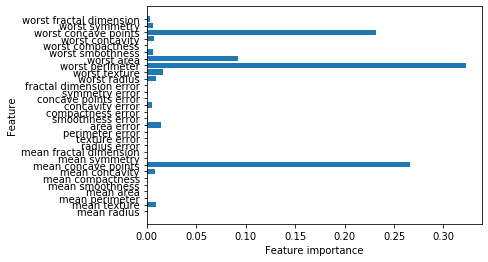

In [11]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
plot_feature_importances_cancer(gbrt)

In [12]:
#gbrt完全忽略了某些特征，先尝试随机森林，鲁棒性很好，如果时间太长可使用gbrt
#xgboost
#需仔细调参，时间较长，无需缩放，适于二元特征与连续特征同时存在的数据集
#不适用高维数据，learning_rate越低需要更多的树构建相似复杂度模型，增大n_estimators会导致过拟合
#max_depth一般不超过5

Text(0, 0.5, 'Feature 1')

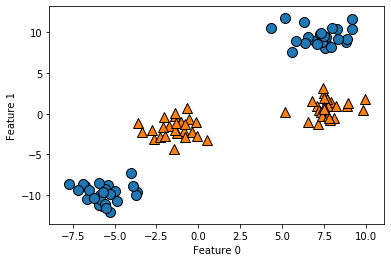

In [16]:
#svm
X,y = sklearn.datasets.make_blobs(centers=4,random_state=8)
y = y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

E:\conda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

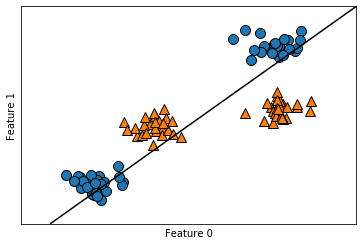

In [17]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")